This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

In [373]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [374]:
#reading the dataset
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [305]:
data.shape

(301, 9)

In [306]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [307]:
# For Object data type columns
c = data.dtypes[data.dtypes == 'object'].index
data[c].describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [308]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [309]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [310]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [311]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [312]:
data.Car_Name.value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Bajaj Avenger 150      1
Honda CB Unicorn       1
Bajaj Dominar 400      1
Hero Passion X pro     1
Bajaj Pulsar RS200     1
Name: Car_Name, Length: 98, dtype: int64

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [314]:
# CHECK missing or null values

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [315]:
# CHECK duplicate values

data.duplicated().sum()

2

In [316]:
## Display duplicated values

duplicated_data = data[data.duplicated(keep = False)]
duplicated_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [317]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [318]:
# Dropping column 'Car_Name'
final_dataset = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [319]:
# Changing YEAR column to NO. of YEARS

final_dataset['Current_Year'] = 2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [320]:
final_dataset['No_of_Years'] = final_dataset['Current_Year'] - final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [321]:
# Dropping Year and Current_Year columns
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [322]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [323]:
# CONVERTING categorical features to DUMMY varibales
final_dataset = pd.get_dummies(final_dataset,drop_first=True) ## drop_first = TRUE : to avoid dummy variable trap

In [324]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [325]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

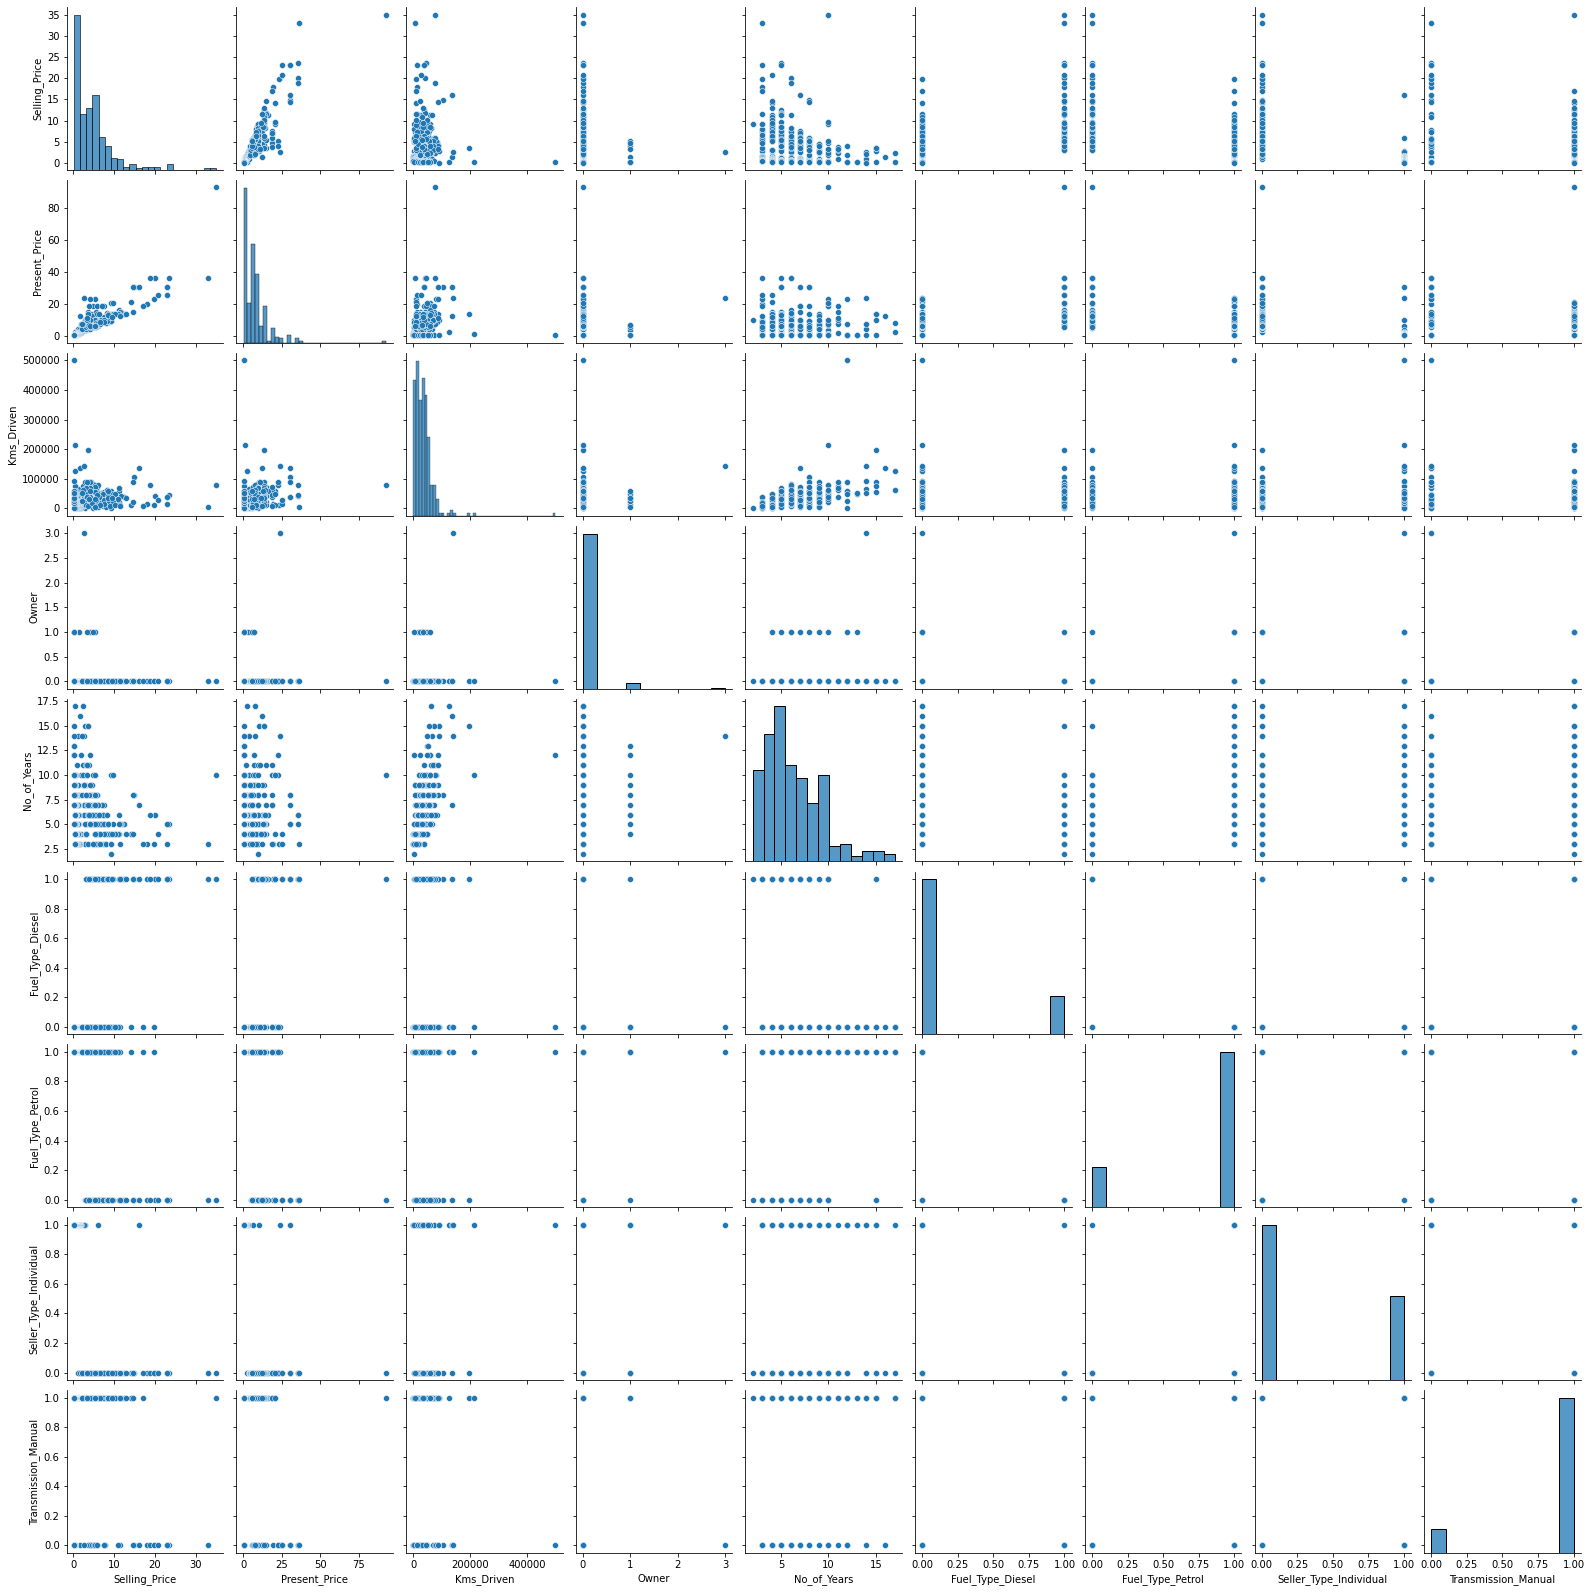

In [376]:
sns.pairplot(final_dataset)

In [377]:
corrmat = final_dataset.corr()
corrmat

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

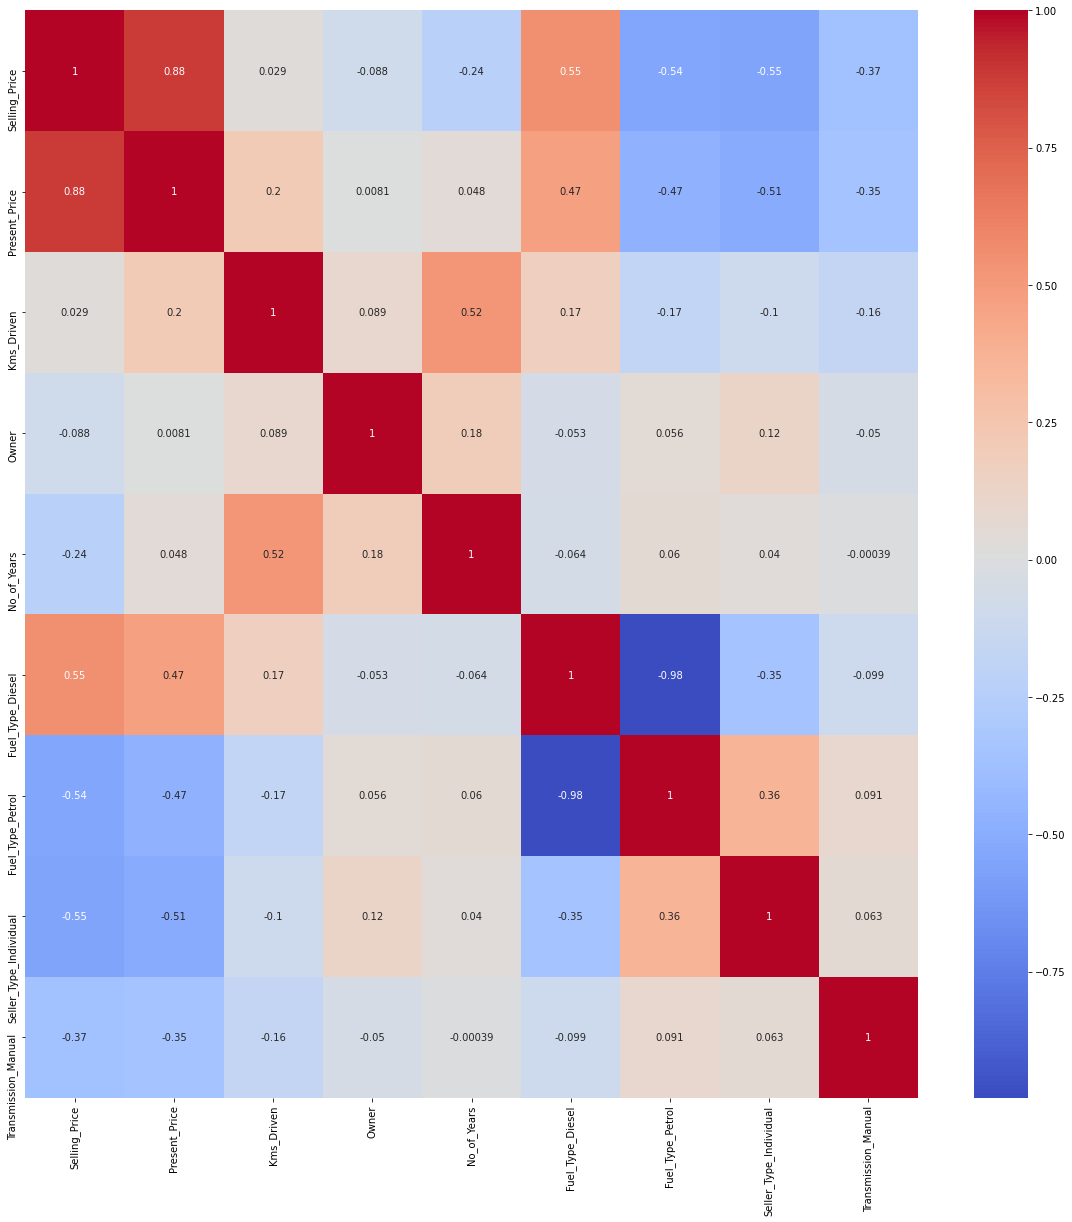

In [378]:
# Finding Correlation b/w variables
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heatmap
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='coolwarm')

In [379]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [380]:
# Separating Independent and Dependent features
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [332]:
x.head()

,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [333]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [381]:
## Finding FEATURE IMPORTANCE

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [335]:
model.feature_importances_

array([0.41748935, 0.0386682 , 0.00089692, 0.07893127, 0.20739708,
       0.00765832, 0.12231277, 0.12664609])

In [336]:
sorted(model.feature_importances_)

[0.0008969154495056741,
 0.007658320478781704,
 0.038668202932013875,
 0.07893126851175025,
 0.12231277381603724,
 0.12664608878665568,
 0.20739708335281104,
 0.4174893466724446]

In [337]:
type(model.feature_importances_)

numpy.ndarray

In [382]:
np.round(model.feature_importances_,4)

array([0.3764, 0.0419, 0.0004, 0.0744, 0.2357, 0.0099, 0.1197, 0.1416])

In [383]:
np.set_printoptions(suppress=True)
np.round(model.feature_importances_,6)

array([0.376382, 0.041913, 0.000419, 0.074411, 0.235677, 0.009863,
       0.119745, 0.141591])

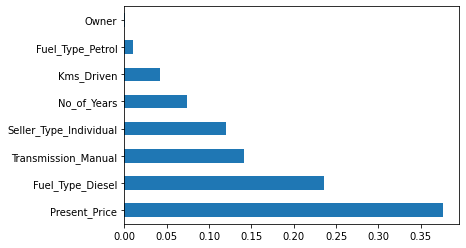

In [384]:
## plot graph of feature importance for better visualization

feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.nlargest(8).plot(kind = 'barh')
plt.show()

In [341]:
# Splitting the Training data and Testing Data
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0) 

In [387]:
# Creating Function for calculating different Evaluation metrics

def metrics_results(y_test,predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2 : ', metrics.r2_score(y_test, predictions))

In [386]:
#!pip install xgboost

In [388]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

### Linear Regression

In [389]:
lin_reg_model = LinearRegression().fit(x_train,y_train)
lin_reg_predict = lin_reg_model.predict(x_test)
metrics_results(y_test,lin_reg_predict)

MAE: 1.2426713915033707
MSE: 4.43212826566762
RMSE: 2.1052620420431323
R^2 :  0.8517983059778262


### LASSO Regression

In [390]:
l2_model = Lasso(alpha= 0.01).fit(x_train,y_train)
l2_predict = l2_model.predict(x_test)
metrics_results(y_test,l2_predict)

MAE: 1.2315497438739682
MSE: 4.426512421079722
RMSE: 2.1039278554835765
R^2 :  0.8519860888287285


### Ridge Regression

In [391]:
l1_model = Ridge(alpha=0.2).fit(x_train, y_train)
l1_predict = l1_model.predict(x_test)
metrics_results(y_test, l1_predict)

MAE: 1.241037406991195
MSE: 4.42969124112063
RMSE: 2.1046831688215284
R^2 :  0.851879795308592


### Decision Tree

In [392]:
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
metrics_results(y_test, dt_predict)

MAE: 0.9253846153846155
MSE: 2.7644604395604397
RMSE: 1.6626666651979403
R^2 :  0.9075618538899783


### Random Forest

In [393]:
rf_model = RandomForestRegressor(n_estimators=100).fit(x_train,y_train)
rf_predict = rf_model.predict(x_test)
metrics_results(y_test, rf_predict)

MAE: 0.7680648351648354
MSE: 2.6116260915384593
RMSE: 1.6160526264755302
R^2 :  0.9126723353390571


### Gradient Boost

In [394]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)
metrics_results(y_test, gb_predict)

MAE: 0.7547025191082288
MSE: 2.386092614838049
RMSE: 1.5446982277577874
R^2 :  0.9202137333542331


### AdaBoost

In [395]:
ab_model = AdaBoostRegressor().fit(x_train, y_train)
ab_predict = ab_model.predict(x_test)
metrics_results(y_test, ab_predict)

MAE: 1.1519142307295092
MSE: 3.7029764548830957
RMSE: 1.9243119432366198
R^2 :  0.8761797153324864


### XGBoost

In [396]:
xgb_model = XGBRegressor(n_estimators=200).fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
metrics_results(y_test, xgb_predict)

MAE: 0.7862596584414389
MSE: 2.542207092061842
RMSE: 1.5944300210613955
R^2 :  0.9149935708049737


### KNN

In [397]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
metrics_results(y_test, knn_predict)

MAE: 4.020945054945055
MSE: 39.06700408791208
RMSE: 6.25036031664672
R^2 :  -0.3063241492916562


In [398]:
# Combining Evaluation Metrics Results of different models
def evaluation_metrics_return(y_test,predictions):
    MAE = metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    R2_score = metrics.r2_score(y_test, predictions)
    
    return MAE,MSE,RMSE,R2_score

eval_metrics = []

algo_names = ['Linear','LASSO','Ridge','Decision Tree', 'Random Forest','Gradient Boost', 'AdaBoost', 'XGBoost', 'KNN']
models_list = [lin_reg_model, l2_model, l1_model, dt_model, rf_model, gb_model, ab_model, xgb_model, knn_model]
predictions_list = [lin_reg_predict, l2_predict, l1_predict, dt_predict, rf_predict, gb_predict, ab_predict, xgb_predict, knn_predict]

i = 0
for model in models_list:
    #model.predict(x_test)
    MAE, MSE, RMSE, R2_score = evaluation_metrics_return(y_test,predictions_list[i])
    eval_metrics.append([algo_names[i], MAE, MSE, RMSE, R2_score])
    i = i+1
#eval_metrics

model_performances_df = pd.DataFrame(data = eval_metrics, columns=['Model_name','MAE','MSE','RMSE','R2_score'])
model_performances_df.sort_values('MAE')

,Model_name,MAE,MSE,RMSE,R2_score
5,Gradient Boost,0.754703,2.386093,1.544698,0.920214
4,Random Forest,0.768065,2.611626,1.616053,0.912672
7,XGBoost,0.786260,2.542207,1.594430,0.914994
3,Decision Tree,0.925385,2.764460,1.662667,0.907562
6,AdaBoost,1.151914,3.702976,1.924312,0.876180
1,LASSO,1.231550,4.426512,2.103928,0.851986
2,Ridge,1.241037,4.429691,2.104683,0.851880
0,Linear,1.242671,4.432128,2.105262,0.851798
8,KNN,4.020945,39.067004,6.250360,-0.306324


<b>Why is MAE better than RMSE?</b> <br><br>
The MAE is a linear score which means that all the individual differences are weighted equally in the average. The RMSE is a quadratic scoring rule which measures the average magnitude of the error. ... Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors.

<b>Random Forest</b> is a better model

In [399]:
rf_random = RandomForestRegressor()

In [400]:
## Performing Hyperparameters Tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [401]:
# Using different parameters value to eventually perform RandomizedSearchCV

#No. of trees in random forest
n_estmators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]
# No. of features to consider at each split
max_features = ['auto','sqrt']
# Mox no. of levels in a tree 
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
# The minimum number of samples required to split an internal node:
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [402]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [403]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [404]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [405]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [406]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [407]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [408]:
rf_random.best_score_

-4.034032125419328

In [409]:
predictions = rf_random.predict(x_test)
predictions

array([ 7.14153,  0.54982,  5.08226,  9.35983, 16.68335,  5.03812,
        3.42135,  0.75903,  4.64035,  4.5169 ,  3.09956,  0.87476,
        4.98253,  7.89941,  7.93442, 10.32058,  7.42201,  4.06112,
        0.49524,  1.4764 ,  3.95043,  4.67827,  5.5349 ,  9.41494,
        0.27425,  0.77841,  0.50637,  0.64454,  0.51833,  4.85267,
        5.24876,  5.8458 ,  0.51469,  8.83592,  3.49259,  1.19712,
        5.67272,  7.51457,  0.24426,  9.03884,  9.38353, 19.48403,
        4.88261,  4.1421 ,  5.41975, 12.07325,  0.32037,  0.90132,
        4.98325,  8.43822,  7.58339,  3.53904,  4.7339 , 20.51796,
        1.09562,  1.05929,  0.52388,  2.75755,  3.70555,  1.27036,
        3.90982,  8.6723 ,  3.15813, 20.83024,  4.15335,  5.59697,
       10.24078,  4.80622,  0.52946,  3.01377,  3.41797,  3.0359 ,
        0.64608,  5.47435,  0.88152,  3.05562,  0.52238,  9.05966,
        1.1714 ,  2.73515,  0.50686, 10.18979,  7.4837 ,  5.50242,
        5.05546,  0.96519,  6.23158,  5.98035,  0.48153,  5.00

C:\Users\yatin.chadha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

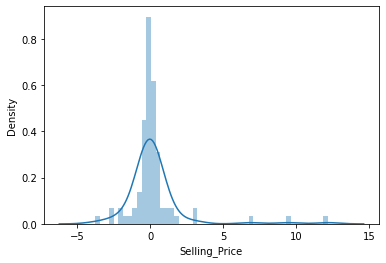

In [410]:
sns.distplot(y_test-predictions)

Text(0, 0.5, 'predictions')

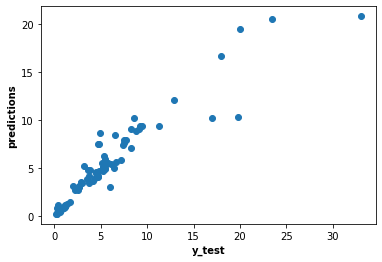

In [411]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test', weight = 'bold')
plt.ylabel('predictions', weight = 'bold')

<AxesSubplot:xlabel='Selling_Price'>

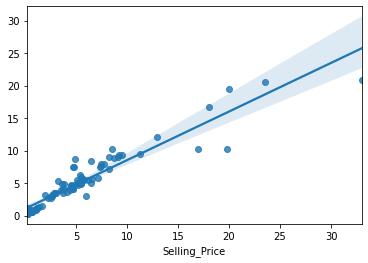

In [412]:
# Use regression plot

sns.regplot(x = y_test, y = predictions, data = final_dataset)

- The <b>difference between y_test and predictions should be minimal</b> so as to declare the model as <b>GOOD FIT</b>.
- Since it is minimal, we are getting a very closed Gaussian Distribution graph. 
- Also, the values of y_test and y_predictions are almost inline 

In [413]:
# Pickling the file  
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [414]:
import os
os.getcwd()

'C:\\Users\\yatin.chadha\\Vehicle dataset from CARDEKHO'

In [415]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)